In [15]:
import json
import pandas
import subprocess

In [16]:
# run_max.py
import subprocess
# Define command and arguments

# Variable number of args in a list
# Build subprocess command

# check_output will run the command and store to result


In [17]:
def apply_rima(f, m, h):
    parameters = {'f': f, 'm': m, 'h': h}
    with open('./rima_par.json', 'w') as f:
        json.dump(parameters, f)
    # subprocess.call("./rima_func_script.R")
    command = 'C:/Program Files/R/R-4.3.1/bin/Rscript.exe'
    path2script = 'C:/TET/macro/rima_func_script.R'
    cmd = [command, path2script]
    x = subprocess.run(cmd, universal_newlines=True, shell=True)
    print(x)

In [18]:
driver = 'JTU5300QUL'
d = './data/{0}.csv'

data = pandas.read_csv(d.format(driver))
data

,DATE,JTU5300QUL
0,2000-12-01,50
1,2001-01-01,80
2,2001-02-01,29
3,2001-03-01,28
4,2001-04-01,52
...,...,...
266,2023-02-01,42
267,2023-03-01,44
268,2023-04-01,56
269,2023-05-01,39


In [19]:
d_lag = './data/{0}_lag.csv'
d_app = './data/{0}_app.csv'

lag_umpk = 40
data.iloc[:lag_umpk, :].to_csv(d_lag.format(driver), index=False)
data.iloc[lag_umpk:, :].to_csv(d_app.format(driver), index=False)

In [20]:
apply_rima(f=driver, m=12, h=1)

CompletedProcess(args=['C:/Program Files/R/R-4.3.1/bin/Rscript.exe', 'C:/TET/macro/rima_func_script.R'], returncode=0)


In [21]:
data_est = pandas.read_csv('./data/{0}_arima_pred.csv'.format(driver)).rename(columns={driver: '{0}_orig'.format(driver)})
data_est

,Unnamed: 0,DATE,JTU5300QUL_orig,JTU5300QUL_arima_hat,JTU5300QUL_arima_hat_lower,JTU5300QUL_arima_hat_upper
0,1,2004-04-01,58,76,51.981074,100.018926
1,2,2004-05-01,61,42,17.981074,66.018926
2,3,2004-06-01,70,50,25.981074,74.018926
3,4,2004-07-01,90,47,22.981074,71.018926
4,5,2004-08-01,43,49,24.981074,73.018926
...,...,...,...,...,...,...
226,227,2023-02-01,42,33,8.981074,57.018926
227,228,2023-03-01,44,38,13.981074,62.018926
228,229,2023-04-01,56,78,53.981074,102.018926
229,230,2023-05-01,39,48,23.981074,72.018926


In [22]:
data = data.merge(right=data_est, left_on='DATE', right_on='DATE', how='left')
data

,DATE,JTU5300QUL,Unnamed: 0,JTU5300QUL_orig,JTU5300QUL_arima_hat,JTU5300QUL_arima_hat_lower,JTU5300QUL_arima_hat_upper
0,2000-12-01,50,NaN,NaN,NaN,NaN,NaN
1,2001-01-01,80,NaN,NaN,NaN,NaN,NaN
2,2001-02-01,29,NaN,NaN,NaN,NaN,NaN
3,2001-03-01,28,NaN,NaN,NaN,NaN,NaN
4,2001-04-01,52,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...
266,2023-02-01,42,227.0,42.0,33.0,8.981074,57.018926
267,2023-03-01,44,228.0,44.0,38.0,13.981074,62.018926
268,2023-04-01,56,229.0,56.0,78.0,53.981074,102.018926
269,2023-05-01,39,230.0,39.0,48.0,23.981074,72.018926


In [23]:
data_final = data.dropna()
data_final

,DATE,JTU5300QUL,Unnamed: 0,JTU5300QUL_orig,JTU5300QUL_arima_hat,JTU5300QUL_arima_hat_lower,JTU5300QUL_arima_hat_upper
40,2004-04-01,58,1.0,58.0,76.0,51.981074,100.018926
41,2004-05-01,61,2.0,61.0,42.0,17.981074,66.018926
42,2004-06-01,70,3.0,70.0,50.0,25.981074,74.018926
43,2004-07-01,90,4.0,90.0,47.0,22.981074,71.018926
44,2004-08-01,43,5.0,43.0,49.0,24.981074,73.018926
...,...,...,...,...,...,...,...
266,2023-02-01,42,227.0,42.0,33.0,8.981074,57.018926
267,2023-03-01,44,228.0,44.0,38.0,13.981074,62.018926
268,2023-04-01,56,229.0,56.0,78.0,53.981074,102.018926
269,2023-05-01,39,230.0,39.0,48.0,23.981074,72.018926


In [24]:
data_final[data_final[driver] != data_final['{0}_orig'.format(driver)]]

,DATE,JTU5300QUL,Unnamed: 0,JTU5300QUL_orig,JTU5300QUL_arima_hat,JTU5300QUL_arima_hat_lower,JTU5300QUL_arima_hat_upper


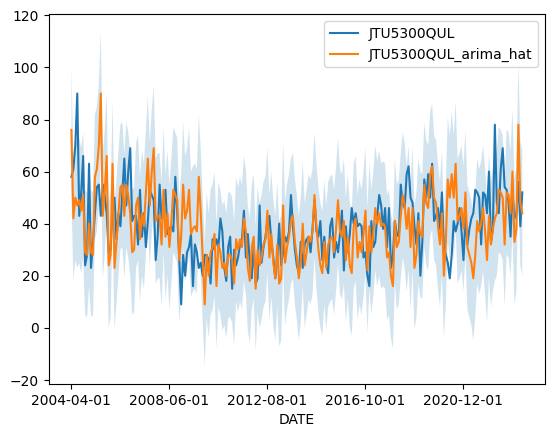

In [25]:
ax = data_final.set_index('DATE')[[driver, '{0}_arima_hat'.format(driver)]].plot()
ax.fill_between(data_final['DATE'].values, data_final['{0}_arima_hat_lower'.format(driver)].values, data_final['{0}_arima_hat_upper'.format(driver)].values, alpha=0.2)